# K-means Aplicado a Metodos de aprendizaje

In [1]:
import numpy as np #para hacer calculos cientificos
import pandas as pd #analisis de datos
import matplotlib.pyplot as plt #creacion de graficos
from sklearn.cluster import KMeans

%matplotlib inline 

### Importar datos

In [2]:
Metodos=pd.read_csv('C:/Users/Estrada/Documents/Mineria de Datos AgoDic2021/datos_metodos.csv',engine='python')

Visualizacion de las caracteristicas de nuestro dataset "Metodos"

In [3]:
Metodos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nombre              96 non-null     object 
 1   Nua                 96 non-null     int64  
 2   Semestre            96 non-null     int64  
 3   Genero              96 non-null     object 
 4   Carrera             96 non-null     object 
 5   Materia             96 non-null     object 
 6   Elección            96 non-null     object 
 7   Tiempo de elección  96 non-null     int64  
 8   TiempoVideo         96 non-null     float64
 9   TiempoPDF           96 non-null     float64
 10  TiempoAudio         96 non-null     float64
 11  TiempoEjemplo       96 non-null     float64
 12  Fecha_hora          96 non-null     object 
 13  Unnamed: 13         0 non-null      float64
dtypes: float64(5), int64(3), object(6)
memory usage: 10.6+ KB


Ahora desplegamos la primera fila para poder ver su contenido

In [4]:
Metodos.head()

,Nombre,Nua,Semestre,Genero,Carrera,Materia,Elección,Tiempo de elección,TiempoVideo,TiempoPDF,TiempoAudio,TiempoEjemplo,Fecha_hora,Unnamed: 13
0,Fidel Perez,145424,12,Hombre,LICE,Algebra Matriz 3X3,video,6,0.584572,0.000000,0.696459,1.967743,11/20/2021 22:49,NaN
1,Fidel Perez,145424,12,Hombre,LICE,Ingles VerbosIrregulares,pdf,8,1.985114,0.530954,0.000000,2.158200,11/20/2021 22:49,NaN
2,Fidel Perez,145424,12,Hombre,LICE,Quimica Electrones de Valencia,video,8,1.830355,0.000000,0.000000,0.000000,11/20/2021 22:49,NaN
3,Fidel Perez,145424,12,Hombre,LICE,Ingles PresntSimple,ejemplo,8,0.000000,2.714251,0.000000,2.304171,11/20/2021 22:49,NaN
4,Fidel Perez,145424,12,Hombre,LICE,CalDif Limites,video,11,0.953845,0.020006,0.301034,0.163310,11/20/2021 22:49,NaN


La columna "Nombre", "NUA", "Materia" y "Fecha y hora" las podemos discriminar, ya que no nos proporciona datos como tal para nuestro analisis.

In [16]:
Metodos_data = Metodos.drop(['Nombre'], axis=1)
Metodos_data = Metodos_data.drop(['Nua'], axis=1)
Metodos_data = Metodos_data.drop(['Materia '], axis=1)
Metodos_data = Metodos_data.drop('Unnamed: 13',1)
Metodos_data = Metodos_data.drop(['Fecha_hora'], axis=1)

Ahora obtenemos los analisis estadisticos descriptivos para los Metodos de aprendizaje

In [17]:
Metodos_data.describe()

,Semestre,Tiempo de elección,TiempoVideo,TiempoPDF,TiempoAudio,TiempoEjemplo
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,8.687500,9.458333,0.929908,0.895798,0.636745,0.818571
std,1.904634,5.411327,1.568451,1.068273,1.184790,1.207333
min,7.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,9.000000,0.489150,0.602902,0.000000,0.515946
75%,10.250000,11.000000,1.125752,1.426192,0.842861,1.184757
max,12.000000,43.000000,8.875425,3.912428,8.229528,8.009899


Como queremos evaluar con respecto a los datos de "genero", "Semestre" y "carrera", requerimos pasar estos datos de un texto a un valor numerico.

In [18]:
genero= Metodos_data.iloc[:, [1]] 
genero = genero.values

for x in range(96):
    if genero[x]=='Hombre':
        genero[x]=1
    elif genero[x]=='Mujer':
        genero[x]=2
    else :
        genero[x]=0

carrera= Metodos_data.iloc[:, [2]] 
carrera = carrera.values

for x in range(96):
    if carrera[x]=='LICE':
        carrera[x]=1
    if carrera[x]=='LISC':
        carrera[x]=2
    if carrera[x]=='LGE':
        carrera[x]=3
    if carrera[x]=='LEI':
        carrera[x]=4
        
eleccion= Metodos_data.iloc[:, [3]] 
eleccion = eleccion.values

for x in range(96):
    if eleccion[x]=='video':
        eleccion[x]=1
    if eleccion[x]=='pdf':
        eleccion[x]=2
    if eleccion[x]=='audio':
        eleccion[x]=3
    if eleccion[x]=='ejemplo':
        eleccion[x]=4       
        
Metodos_data.iloc[:, [1]] = genero
Metodos_data.iloc[:, [2]] = carrera
Metodos_data.iloc[:, [3]] = eleccion

Metodos_data.head()

,Semestre,Genero,Carrera,Elección,Tiempo de elección,TiempoVideo,TiempoPDF,TiempoAudio,TiempoEjemplo
0,12,1,1,1,6,0.584572,0.000000,0.696459,1.967743
1,12,1,1,2,8,1.985114,0.530954,0.000000,2.158200
2,12,1,1,1,8,1.830355,0.000000,0.000000,0.000000
3,12,1,1,4,8,0.000000,2.714251,0.000000,2.304171
4,12,1,1,1,11,0.953845,0.020006,0.301034,0.163310


In [19]:
Metodos_data.describe()

,Semestre,Genero,Carrera,Elección,Tiempo de elección,TiempoVideo,TiempoPDF,TiempoAudio,TiempoEjemplo
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,8.687500,1.437500,1.750000,2.302083,9.458333,0.929908,0.895798,0.636745,0.818571
std,1.904634,0.498682,0.753937,1.223625,5.411327,1.568451,1.068273,1.184790,1.207333
min,7.000000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,1.000000,2.000000,2.000000,9.000000,0.489150,0.602902,0.000000,0.515946
75%,10.250000,2.000000,2.000000,4.000000,11.000000,1.125752,1.426192,0.842861,1.184757
max,12.000000,2.000000,3.000000,4.000000,43.000000,8.875425,3.912428,8.229528,8.009899


### Normalizamos los valores de las caracteristicas

In [20]:
Metodos_norm=(Metodos_data-Metodos_data.min())/(Metodos_data.max()-Metodos_data.min())
Metodos_norm

,Semestre,Genero,Carrera,Elección,Tiempo de elección,TiempoVideo,TiempoPDF,TiempoAudio,TiempoEjemplo
0,1.0,0.0,0.0,0.000000,0.051282,0.065864,0.000000,0.084629,0.245664
1,1.0,0.0,0.0,0.333333,0.102564,0.223664,0.135710,0.000000,0.269442
2,1.0,0.0,0.0,0.000000,0.102564,0.206227,0.000000,0.000000,0.000000
3,1.0,0.0,0.0,1.000000,0.102564,0.000000,0.693751,0.000000,0.287665
4,1.0,0.0,0.0,0.000000,0.179487,0.107470,0.005113,0.036580,0.020389
...,...,...,...,...,...,...,...,...,...
91,0.0,1.0,0.0,0.000000,0.282051,0.241901,0.000000,0.000000,0.000000
92,0.0,1.0,0.0,1.000000,0.051282,0.000000,0.764931,0.000000,0.086528
93,0.0,1.0,0.0,1.000000,0.128205,0.000000,0.106014,0.000000,0.043289
94,0.0,1.0,0.0,0.666667,0.076923,0.000000,0.000000,0.033712,0.232386


In [21]:
Metodos_data.describe()

,Semestre,Genero,Carrera,Elección,Tiempo de elección,TiempoVideo,TiempoPDF,TiempoAudio,TiempoEjemplo
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,8.687500,1.437500,1.750000,2.302083,9.458333,0.929908,0.895798,0.636745,0.818571
std,1.904634,0.498682,0.753937,1.223625,5.411327,1.568451,1.068273,1.184790,1.207333
min,7.000000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,1.000000,2.000000,2.000000,9.000000,0.489150,0.602902,0.000000,0.515946
75%,10.250000,2.000000,2.000000,4.000000,11.000000,1.125752,1.426192,0.842861,1.184757
max,12.000000,2.000000,3.000000,4.000000,43.000000,8.875425,3.912428,8.229528,8.009899


## Busqueda de la cantidad optima de clusters
Calculamos que tan similares son los individuos dentro de los clusters

In [22]:
wcss = [] #lista vacia para guardar los calculos

for i in range(1, 10): #Para crear diferente cantidades de agrupaciones
    kmeans = KMeans (n_clusters = i, max_iter = 300)
    kmeans.fit(Metodos_norm)  #Aplico k-means a la base de datos
    wcss.append(kmeans.inertia_)

C:\Users\Estrada\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


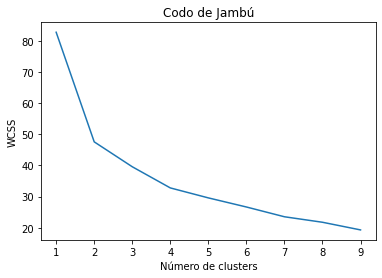

In [23]:
plt.plot(range(1,10), wcss)
plt.title("Codo de Jambú")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') #Wcss. Es un indicador de que tan similares son los individuos dentro de los clusters
plt.show()

In [25]:
clustering = KMeans(n_clusters = 3, max_iter= 300) #Crea el modelo
clustering.fit(Metodos_norm) #Aplica el modelo a la base de datos

KMeans(n_clusters=3)

In [26]:
Metodos_data['KMeans_Clusters'] = clustering.labels_ #los resultados del clustering se guardan en labels_ dentro del modelo 
Metodos_data.head()

,Semestre,Genero,Carrera,Elección,Tiempo de elección,TiempoVideo,TiempoPDF,TiempoAudio,TiempoEjemplo,KMeans_Clusters
0,12,1,1,1,6,0.584572,0.000000,0.696459,1.967743,2
1,12,1,1,2,8,1.985114,0.530954,0.000000,2.158200,2
2,12,1,1,1,8,1.830355,0.000000,0.000000,0.000000,2
3,12,1,1,4,8,0.000000,2.714251,0.000000,2.304171,1
4,12,1,1,1,11,0.953845,0.020006,0.301034,0.163310,2


## Visualizamos los clusters que se formaron

Aplicaremos el analisis de componentes principales para darnos una idea de como se formaron los clustering

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #grafico de 2 dimenciones
pca_metodos = pca.fit_transform(Metodos_norm)
pca_metodos_df = pd.DataFrame(data = pca_metodos, columns = ['Componente_1','Componente_2'])
pca_nombres_metodos = pd.concat ([pca_metodos_df, Metodos_data[['KMeans_Clusters']]], axis=1)

pca_nombres_metodos

,Componente_1,Componente_2,KMeans_Clusters
0,-0.771302,-0.495562,2
1,-0.797244,-0.206622,2
2,-0.761887,-0.524882,2
3,-0.839583,0.409605,1
4,-0.765019,-0.516861,2
...,...,...,...
91,0.441767,-0.187438,0
92,0.374149,0.742329,0
93,0.324215,0.778910,0
94,0.352470,0.485230,0


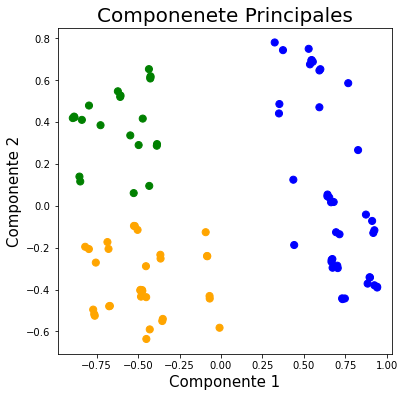

In [28]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1) #grafico dentro de la figura
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componenete Principales', fontsize = 20)

color_theme = np.array(['blue','green','orange'])
ax.scatter(x = pca_nombres_metodos.Componente_1, y = pca_nombres_metodos.Componente_2,
          c=color_theme[pca_nombres_metodos.KMeans_Clusters], s = 50)
plt.show() # No es necesario en jupyter per se agrega por si se usa un programa distinto